In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
train_root = "/content/drive/MyDrive/pic/train/"
vali_root = "/content/drive/MyDrive/pic/valid"

In [4]:
train = ImageDataGenerator(rescale = 1./255.,
                            rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            shear_range = 0.1,
                            zoom_range = 0.1
)

train_data = train.flow_from_directory(train_root, target_size = (150, 150),
                                        color_mode = "rgb",
                                        batch_size = 32,
                                        seed = 1,
                                        class_mode='binary'
)

Found 11220 images belonging to 2 classes.


In [5]:
vali = ImageDataGenerator(rescale = 1./255.)

vali_data = vali.flow_from_directory(vali_root, target_size = (150, 150),
                                        color_mode = "rgb",
                                        batch_size = 32,
                                        seed = 1,
                                        class_mode='binary'
)

Found 600 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                    

In [8]:
learning_rate = 0.001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
hist = model.fit(train_data, validation_data = vali_data, epochs = 25, batch_size = 32, verbose = 2)

Epoch 1/25
351/351 - 110s - loss: 0.5598 - accuracy: 0.7142 - val_loss: 0.3998 - val_accuracy: 0.8200 - 110s/epoch - 313ms/step
Epoch 2/25
351/351 - 97s - loss: 0.4676 - accuracy: 0.7773 - val_loss: 0.3182 - val_accuracy: 0.8700 - 97s/epoch - 276ms/step
Epoch 3/25
351/351 - 97s - loss: 0.4105 - accuracy: 0.8112 - val_loss: 0.2616 - val_accuracy: 0.8950 - 97s/epoch - 275ms/step
Epoch 4/25
351/351 - 97s - loss: 0.3430 - accuracy: 0.8457 - val_loss: 0.2190 - val_accuracy: 0.9167 - 97s/epoch - 275ms/step
Epoch 5/25
351/351 - 97s - loss: 0.3074 - accuracy: 0.8678 - val_loss: 0.2173 - val_accuracy: 0.9150 - 97s/epoch - 276ms/step
Epoch 6/25
351/351 - 96s - loss: 0.2787 - accuracy: 0.8825 - val_loss: 0.2188 - val_accuracy: 0.9083 - 96s/epoch - 274ms/step
Epoch 7/25
351/351 - 96s - loss: 0.2577 - accuracy: 0.8937 - val_loss: 0.1818 - val_accuracy: 0.9317 - 96s/epoch - 275ms/step
Epoch 8/25
351/351 - 97s - loss: 0.2378 - accuracy: 0.9033 - val_loss: 0.1746 - val_accuracy: 0.9267 - 97s/epoch - 2

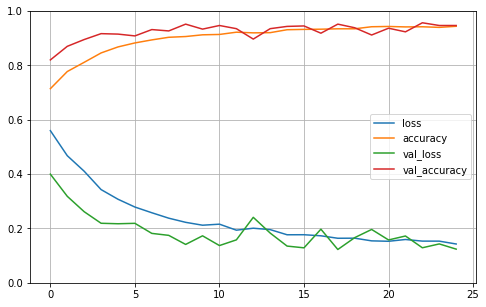

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()